<a href="https://colab.research.google.com/github/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/blob/main/2_dimensionality_reduction_2025_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensionalidad

Esta tarea de aprendizaje no supervisado nos enfocaremos en técnicas que nos permiten disminuir la cantidad de variables de un conjunto de datos intentando no perder información del espacio original.

In [1]:
import numpy as np
import pandas as pd
import sklearn.decomposition # Módulo donde encontramos el análisis de componentes principales
import sklearn.linear_model
import scipy.stats
import matplotlib.pyplot as plt

## Selección de variables

Para poder seleccionar nuestras variables mediante pruebas estadísticas utilizaremos un conjunto de datos de clasificación de flores respecto a las medidas de las mismas mas conocido como Iris Dataset.

![Iris](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification-1024x367.png)

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/iris.csv")
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Actividad 1

Para poder entender por qué unas variables son más importantes que otras, grafique los valores de las variables y las clases de cada instancia de datos en gráficos de dispersión y verifique visualmente si hay variables que expliquen mejor las diferencias entre clases.

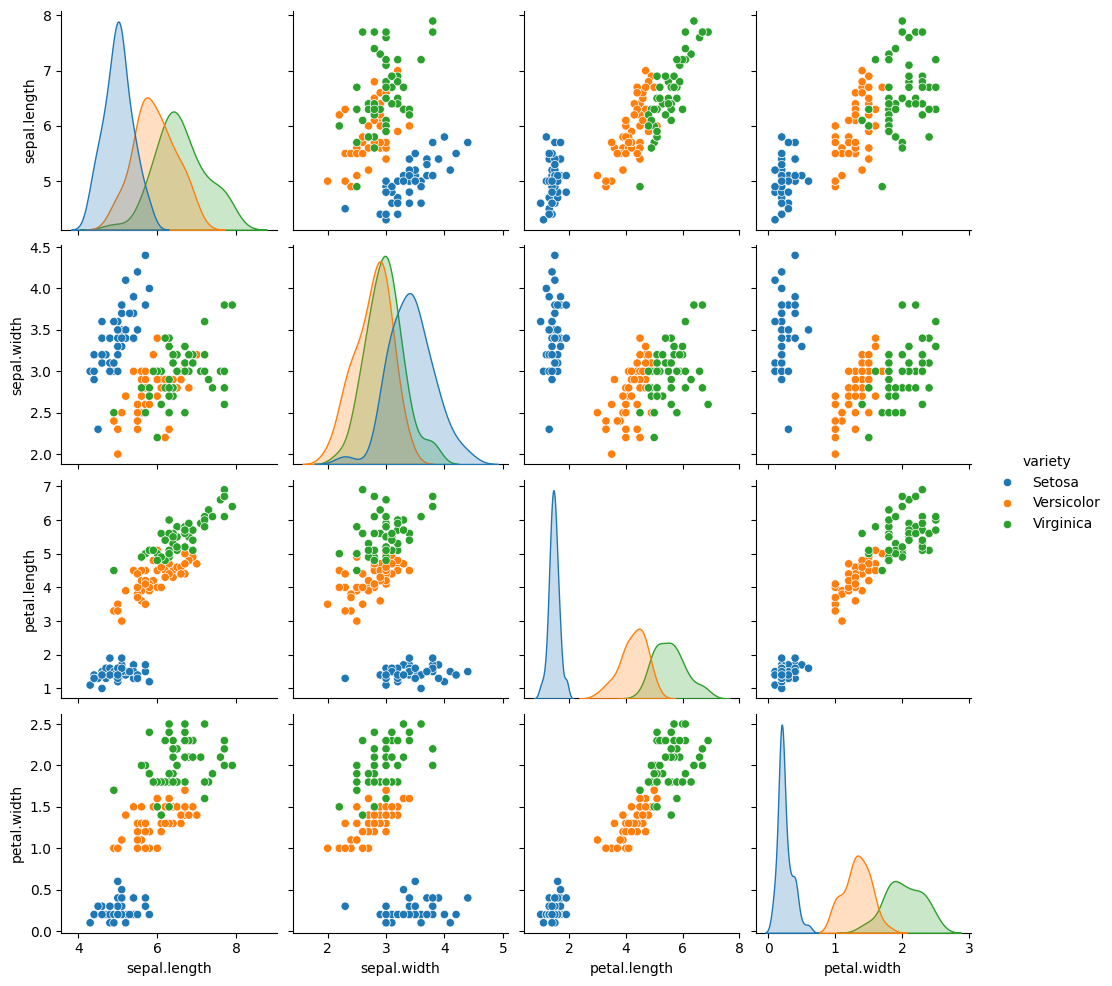

In [3]:
import seaborn as sns
sns.pairplot(iris,hue="variety")

Utilizaremos la prueba estadística ANOVA para comparar si existen diferencia entre las medias dentro de cada una de las variables al separarlas utilizando el tipo de flor.

In [4]:
pvalues = []
for feature in iris.columns[:-1]:
  # Aplicamos la prueba estadística ANOVA agrupando cada característica por el tipo de flor.
  pvalue = scipy.stats.f_oneway(*iris.groupby(by="variety")[feature].apply(list).tolist()).pvalue
  # Extraemos el p_value asociado a cada comparación
  pvalues.append((feature, pvalue))
# Ordenamos el p_value desde el menor al mayor.
sorted(pvalues, key=lambda tup: tup[1])

[('petal.length', np.float64(2.8567766109615584e-91)),
 ('petal.width', np.float64(4.169445839443116e-85)),
 ('sepal.length', np.float64(1.6696691907693826e-31)),
 ('sepal.width', np.float64(4.492017133309115e-17))]

In [5]:
# Realizamos lo mismo con Kruskal-Wallis, la cual es una prueba no-paramétrica.
pvalues = []
for feature in iris.columns[:-1]:
  pvalue = scipy.stats.kruskal(*iris.groupby(by="variety")[feature].apply(list).tolist()).pvalue
  pvalues.append((feature, pvalue))
sorted(pvalues, key=lambda tup: tup[1])

[('petal.width', np.float64(3.261795552421968e-29)),
 ('petal.length', np.float64(4.803973591157605e-29)),
 ('sepal.length', np.float64(8.91873433246198e-22)),
 ('sepal.width', np.float64(1.5692820940316782e-14))]

Con este resultado podemos concluir que las medidas del pétalo son más importantes.

## Análisis de componentes principales (PCA)

In [6]:
line = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/line_clase2.csv")
line.head()

,x,y
0,-0.143944,-0.083106
1,0.644160,0.371906
2,0.466565,0.269372
3,0.054760,0.031616
4,-0.309486,-0.178682


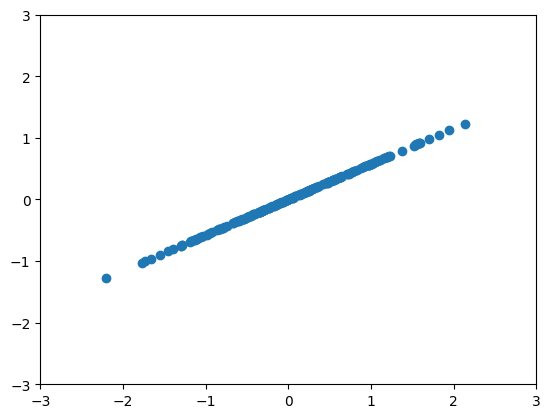

In [7]:
plt.scatter(line.x,line.y)
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.show()

Ajustamos análisis de componentes principales

In [8]:
pca_line = sklearn.decomposition.PCA() # Instanciamos PCA
pca_line.fit(line) # Ajustamos el análisis

PCA()

Al tener nuestro método ajustado podemos obtener los componentes (vectores propios) de nuestro análisis. Se puede observar que el valor absoluto del primer componente es el mayor, debido a que la mayor parte de nuestro conjunto de datos original se encuenta proyectado sobre el el primer componente principal.

In [9]:
pca_line.components_ # Componentes de nuesto PCA

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [10]:
pca_line.explained_variance_

array([8.84446196e-01, 1.94289029e-16])

Al visualizar los componentes sobre nuestro espacio original se puede observar que el primer componente principal se sitúa precisamente sobe nuestra linea de puntos. El segundo componente principal es despreciable debido a que su varianza explicada es mínima.

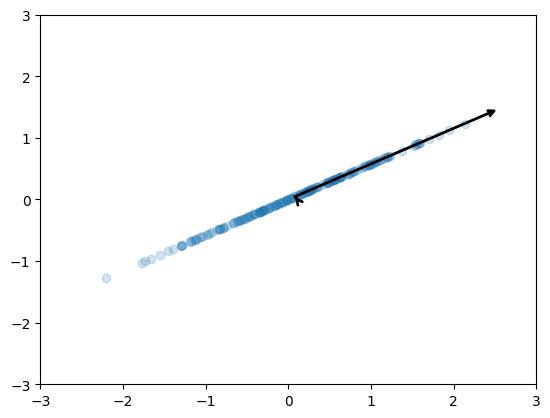

In [11]:
plt.scatter(line.x,line.y, alpha=0.2)
plt.ylim([-3,3])
plt.xlim([-3,3])
for length, vector in zip(pca_line.explained_variance_, pca_line.components_):
    ax=plt.gca()
    v = vector * 3 * np.sqrt(length)
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca_line.mean_ + v, pca_line.mean_, arrowprops=arrowprops)

Ahora importamos exactamente la misma linea anterior, pero a esta se le agregó ruido.

In [12]:
line_noised = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/line_noised_clase2.csv")
line_noised.head()

,x,y
0,-0.159395,-0.056345
1,0.673869,0.320449
2,0.484614,0.238111
3,0.120637,-0.082488
4,-0.228911,-0.318242


Ahora contamos con nuestra nube de puntos, pero hay que notar que tiene exactamente la misma inclinación que el caso anterior

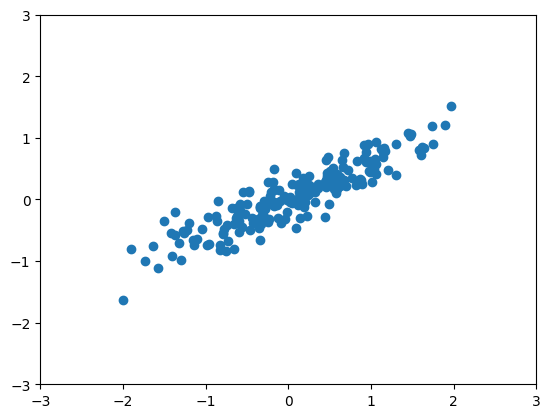

In [13]:
plt.scatter(line_noised.x,line_noised.y)
plt.ylim([-3,3])
plt.xlim([-3,3])
plt.show()

## Actividad 2

Ajuste un análisis de componentes principales sobre los datos de la línea con ruido, extraiga los vectores propios calculados y visualice los 2 componentes principales sobre sus datos.

In [14]:
pca_line_noised = sklearn.decomposition.PCA() # Instanciamos PCA
pca_line_noised.fit(line_noised) # Ajustamos el análisis

PCA()

In [15]:
# Usa esta función si quieres visualizar los componentes principales sobre sus datos.
def plot_data_with_pca(data,pca_object):
  """
  Esta función recibe una matriz bidimensional y un objeto de análisis de
  componentes principales y imprime un gráfico de dispersión de los datos
  entregados con los componentes principales
  """
  plt.scatter(data.x,data.y, alpha=0.2)
  plt.ylim([-2.5,2.5])
  plt.xlim([-2.5,2.5])
  for length, vector in zip(pca_object.explained_variance_, pca_object.components_):
      v = vector * 3 * np.sqrt(length)
      ax=plt.gca()
      arrowprops=dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
      ax.annotate('', pca_object.mean_ + v, pca_object.mean_, arrowprops=arrowprops)
  plt.show()

In [16]:
pca_line_noised.components_

array([[ 0.85937911,  0.51133898],
       [-0.51133898,  0.85937911]])

In [17]:
pca_line_noised.explained_variance_

array([0.88459308, 0.0342513 ])

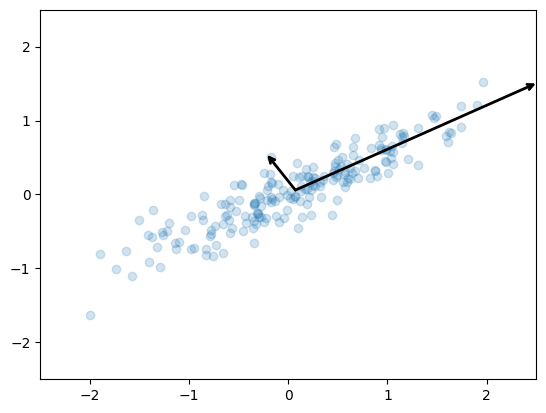

In [18]:
plot_data_with_pca(line_noised, pca_line_noised)

## Actividad 3

Proyecte sus datos de la línea ruidosa sobre el primer componente principal y responda las siguientes preguntas:


*   ¿Cuáles son las coordenadas del elemento 10 del la línea ruidosa?
*   ¿Cuál es la coordenada del elemento 10 del la línea ruidosa proyectada sobre el primer componente principal?
*   ¿Qué podría concluir tomando en cuenta la comparación de las coordenadas en el espacio original y el espacio proyectado respecto a la utilidad de PCA para reducir dimensionalidad?



In [19]:
# ¿Cuáles son las coordenadas del elemento 10 del la línea ruidosa?
line_noised.iloc[10,:]

,10
x,-0.585123
y,-0.069812


In [20]:
# ¿Cuál es la coordenada del elemento 10 del la línea ruidosa proyectada sobre el primer componente principal?
line_noised.dot(pca_line_noised.components_[0,:])[10]

np.float64(-0.538540068586957)

In [21]:
pca_line_noised_1d = sklearn.decomposition.PCA(1)
pca_line_noised_1d.fit_transform(line_noised)[10]

array([-0.63110719])

## MNIST

MNIST es un conjunto de datos de imágenes de números manuscritos. Cada fila del conjunto de datos contiene los 64 pixeles de cada imagen junto con el número al cual pertenece.

In [22]:
mnist = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/mnist.csv")
mnist.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


El conjunto de datos contiene 1797 imágenes y 65 atributos (pixeles + etiqueta)

In [23]:
mnist.shape

(1797, 65)

Así se ve el conjunto de datos.

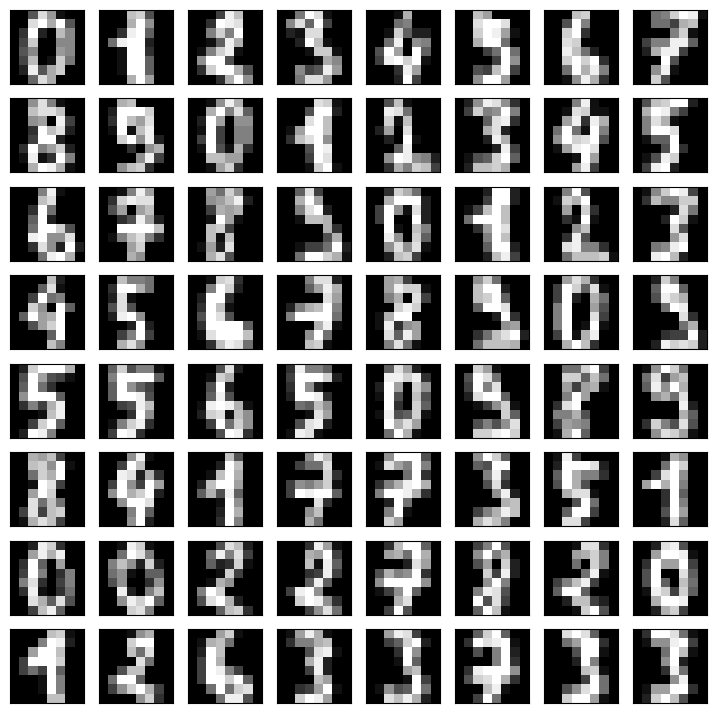

In [24]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        mnist.iloc[i,:-1].values.reshape(8,-1),
        cmap="gray"
    )

Ajustemos un PCA sobre el conjunto de datos.

In [25]:
pca_mnist = sklearn.decomposition.PCA()
pca_mnist.fit(mnist.iloc[:,:-1])

PCA()

Obtenemos una matriz con 64 componentes.

In [26]:
pca_mnist.components_.shape

(64, 64)

In [27]:
pca_mnist.components_

array([[ 0.00000000e+00, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 0.00000000e+00,  1.01064569e-02,  4.90849204e-02, ...,
        -1.76697117e-01, -1.94547053e-02,  6.69693895e-03],
       [ 0.00000000e+00, -1.83420720e-02, -1.26475543e-01, ...,
        -2.32084163e-01, -1.67026563e-01, -3.48043832e-02],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -9.19981121e-16, ...,
         1.30640132e-16, -1.92320316e-16,  2.52081170e-15],
       [-0.00000000e+00, -0.00000000e+00, -3.22071307e-17, ...,
        -4.29229051e-17, -7.51331214e-17, -1.10873810e-17],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Así se ve el primer componente.

In [28]:
pca_mnist.components_[0]

array([ 0.00000000e+00, -1.73094651e-02, -2.23428835e-01, -1.35913304e-01,
       -3.30323092e-02, -9.66340844e-02, -8.32943805e-03,  2.26900082e-03,
       -3.20516495e-04, -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
       -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,  4.47779518e-03,
       -4.94136398e-05, -7.95419375e-02,  8.33951454e-02,  2.15915342e-01,
       -1.72126801e-01, -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
        9.85488574e-05,  6.42319144e-02,  2.54093316e-01, -3.56771026e-02,
       -2.09462569e-01, -4.31311420e-02,  5.13118688e-02,  2.13422732e-04,
        0.00000000e+00,  1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
        8.52007908e-02,  3.72982855e-02,  2.15866980e-02,  0.00000000e+00,
        1.28865585e-03,  1.06945287e-01,  3.03067457e-01,  2.47813041e-01,
        2.09637296e-01,  1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
        6.93023548e-04, -8.35144239e-03, -5.58598986e-02,  9.30534169e-02,
        1.07387720e-01, -

In [29]:
pca_mnist.components_.shape

(64, 64)

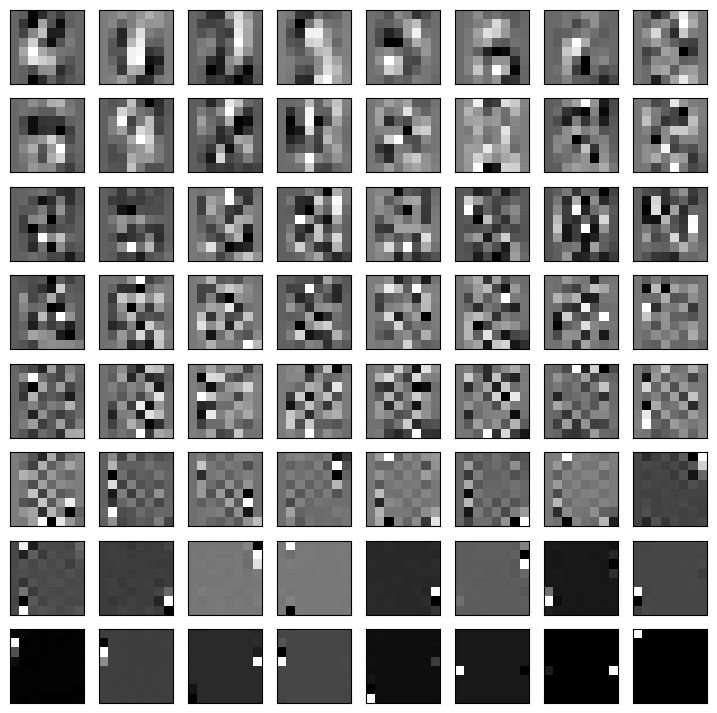

In [30]:
fig,axs = plt.subplots(8,8,figsize=(9, 9),subplot_kw={'xticks':[], 'yticks':[]})

for i,ax in enumerate(axs.flat):
    ax.imshow(
        pca_mnist.components_[i].reshape(8,-1),
        cmap="gray"
    )

Acá podemos ver cuánta varianza explica cada uno de los 64 componentes.

In [31]:
pca_mnist.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Visualizamos la suma acumulada de las varianzas explicadas por cada componente.

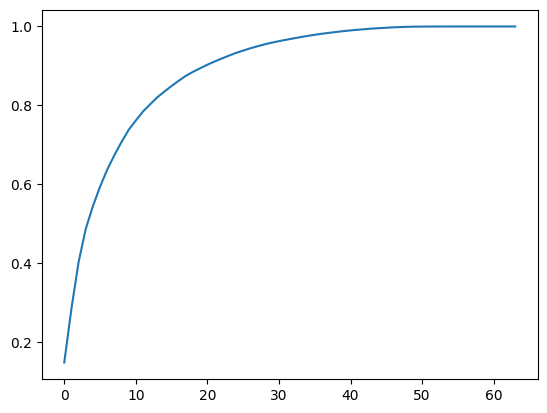

In [32]:
plt.plot(
    range(len(pca_mnist.explained_variance_ratio_)),
    np.cumsum(pca_mnist.explained_variance_ratio_)
)

Ajustemos un PCA de sólo 2 componentes para visualizar el conjunto de datos en un gráfico de dispersión.

In [33]:
pca_mnist_2d = sklearn.decomposition.PCA(2)
mnist_2d=pca_mnist_2d.fit_transform(mnist.iloc[:,:-1])
mnist_2d.shape

(1797, 2)

Cada uno de los números tienden a acumularse juntos

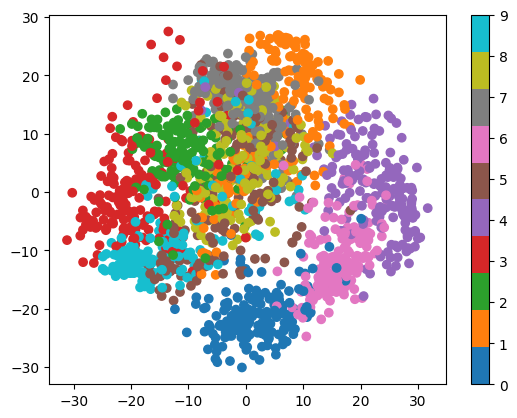

In [34]:
plt.scatter(
    mnist_2d[:,0],
    mnist_2d[:,1],
    c=mnist.label,
    cmap='tab10'
)
plt.colorbar()

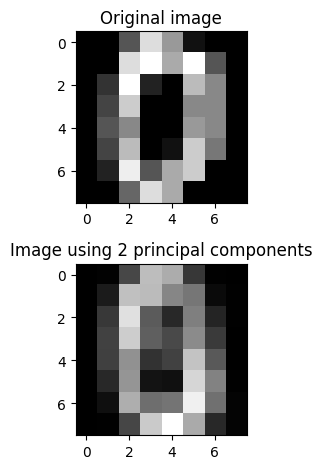

In [35]:
fig, axs = plt.subplots(2)

axs[0].imshow(
    mnist.iloc[0,:-1].values.reshape(8,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    pca_mnist_2d.inverse_transform(mnist_2d)[0].reshape(8,-1),
    cmap="gray"
)
axs[1].set_title("Image using 2 principal components")
fig.tight_layout()

## Actividad 4

Ajusta un PCA cuyos componentes principales expliquen el 95% de la varianza del conjunto de datos.
* ¿Cuántos componentes fueron necesarios?
* ¿Cómo se ve la imagen de un número al usar ese número de componentes principales?
* ¿Cuántas componentes PCA es posible calcular para el conjunto de datos?

In [36]:
# TODO: Ajuste y visualización de un PCA que explique el 95% de la varianza del conjunto de datos
# HINT:
pca = sklearn.decomposition.PCA(0.95)
pca.fit(mnist.iloc[:,:-1])

PCA(n_components=0.95)

In [37]:
# ¿Cuántos componentes fueron necesarios?
pca.components_.shape[0]

29

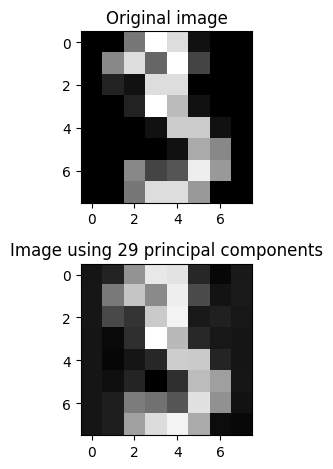

In [39]:
# ¿Cómo se ve la imagen de un número al usar ese número de componentes principales?
mnist_95=pca.fit_transform(mnist.iloc[:,:-1])

fig, axs = plt.subplots(2)

axs[0].imshow(
    mnist.iloc[3,:-1].values.reshape(8,-1),
    cmap="gray"
)
axs[0].set_title("Original image")

axs[1].imshow(
    pca.inverse_transform(mnist_95)[3].reshape(8,-1),
    cmap="gray"
)
axs[1].set_title("Image using 29 principal components")
fig.tight_layout()

In [40]:
# ¿Cuántas componentes PCA es posible calcular para el conjunto de datos?
pca_mnist.components_.shape[1]

64

## Bonus: Reducción de dimensionalidad con matriz de correlación.

La matriz de correlación nos dice que tan correlacionadas pueden estar dos variables, en la práctica si la correlación es perfecta (1.0 o -1.0), deben estar representando la misma información.

Pandas correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [41]:
# Cargamos la data nuevamente
mnist = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/mnist.csv")
mnist.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [147]:
# Generacion de la matriz de correlacion
corr = mnist.iloc[:,:-1].corr(method='pearson')
corr.style.format(precision=2).background_gradient(cmap='coolwarm')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pixel_0_1,nan,1.00,0.56,0.21,-0.02,0.06,0.05,-0.04,0.03,0.56,0.22,-0.11,0.03,-0.06,-0.03,-0.04,-0.01,0.21,-0.11,-0.11,0.10,-0.17,-0.13,-0.04,-0.01,-0.09,-0.15,0.07,0.04,-0.21,-0.15,-0.02,nan,-0.17,-0.18,0.04,-0.06,-0.24,-0.17,nan,-0.02,-0.12,-0.14,0.02,-0.05,-0.16,-0.09,-0.03,-0.01,0.23,0.12,0.02,0.03,-0.01,0.03,-0.05,-0.01,0.86,0.56,0.15,-0.10,-0.03,0.03,-0.04
pixel_0_2,nan,0.56,1.00,0.56,-0.08,0.04,0.00,-0.06,0.02,0.58,0.63,-0.29,0.03,0.06,-0.09,-0.10,-0.02,0.28,-0.08,-0.31,0.21,-0.09,-0.22,-0.12,-0.04,-0.15,-0.31,0.11,0.20,-0.19,-0.19,-0.05,nan,-0.34,-0.40,-0.06,-0.12,-0.28,-0.18,nan,-0.07,-0.27,-0.34,-0.16,-0.20,-0.19,-0.07,-0.06,-0.04,0.21,0.26,-0.04,-0.05,0.08,0.05,-0.00,-0.03,0.52,0.94,0.50,-0.13,-0.04,0.07,0.08
pixel_0_3,nan,0.21,0.56,1.00,0.02,-0.17,-0.12,-0.04,0.04,0.33,0.60,-0.00,-0.07,0.02,-0.18,-0.11,0.02,0.19,0.04,-0.36,0.07,-0.02,-0.22,-0.15,-0.00,-0.11,-0.26,-0.06,0.09,-0.18,-0.14,-0.07,nan,-0.23,-0.22,0.02,-0.08,-0.23,-0.04,nan,-0.10,-0.26,-0.10,-0.03,-0.24,-0.21,0.09,0.05,-0.06,0.02,0.30,0.28,-0.18,0.02,0.14,0.08,-0.05,0.18,0.56,0.77,-0.07,-0.05,0.05,0.08
pixel_0_4,nan,-0.02,-0.08,0.02,1.00,0.51,0.13,0.01,0.04,0.05,0.01,-0.14,0.16,0.39,0.13,0.01,0.01,0.04,-0.12,-0.16,-0.03,0.18,0.08,0.02,0.01,0.03,-0.06,0.04,0.09,0.12,0.08,0.01,nan,-0.03,-0.02,0.03,0.07,0.09,0.05,nan,0.02,-0.02,-0.10,-0.04,0.05,0.07,-0.09,-0.04,0.02,-0.02,-0.17,-0.04,0.03,-0.12,-0.26,-0.21,0.02,-0.05,-0.02,-0.01,-0.08,-0.22,-0.25,-0.22
pixel_0_5,nan,0.06,0.04,-0.17,0.51,1.00,0.61,0.15,0.00,0.04,0.07,-0.20,-0.05,0.54,0.53,0.11,-0.03,0.07,-0.05,-0.19,-0.08,0.21,0.16,-0.01,-0.02,0.04,-0.04,0.10,0.16,0.16,0.00,-0.03,nan,-0.19,-0.14,-0.02,0.08,0.07,-0.08,nan,-0.03,-0.16,-0.33,-0.17,0.12,0.02,-0.25,-0.08,-0.01,-0.04,-0.30,-0.16,0.03,-0.16,-0.35,-0.19,0.03,0.06,0.10,-0.07,-0.35,-0.27,-0.27,-0.17
pixel_0_6,nan,0.05,0.00,-0.12,0.13,0.61,1.00,0.49,-0.02,-0.04,-0.00,0.00,-0.07,0.19,0.73,0.37,-0.02,-0.03,0.03,-0.08,-0.15,0.06,0.30,0.12,-0.01,-0.00,0.02,0.02,0.04,0.14,0.07,0.02,nan,-0.13,-0.06,0.02,0.08,0.09,-0.05,nan,-0.03,-0.12,-0.23,-0.05,0.16,-0.05,-0.23,-0.04,-0.01,-0.05,-0.27,-0.06,0.04,-0.27,-0.27,-0.09,-0.00,0.06,0.04,-0.05,-0.38,-0.30,-0.18,-0.08
pixel_0_7,nan,-0.04,-0.06,-0.04,0.01,0.15,0.49,1.00,-0.01,-0.06,-0.04,0.06,-0.03,0.03,0.42,0.71,-0.01,-0.07,-0.01,-0.02,-0.08,0.02,0.31,0.28,-0.00,-0.05,-0.03,-0.05,-0.03,0.12,0.12,0.15,nan,-0.06,-0.02,-0.00,0.04,0.07,-0.00,nan,-0.01,-0.05,-0.07,0.00,0.08,-0.07,-0.09,-0.01,-0.00,-0.05,-0.13,0.00,0.00,-0.16,-0.09,-0.03,-0.00,-0.04,-0.05,0.00,-0.18,-0.14,-0.06,-0.02
pixel_1_0,nan,0.03,0.02,0.04,0.04,0.00,-0.02,-0.01,1.00,0.22,0.04,-0.04,0.01,0.03,-0.03,-0.01,0.28,0.14,-0.04,-0.02,0.05,-0.00,-0.03,-0.01,-0.00,0.02,-0.00,0.02,0.03,-0.05,-0.04,-0.00,nan,-0.03,-0.03,0.03,-0.00,-0.06,-0.04,nan,-0.00,-0.03,-0.01,0.02,0.00,-0.02,-0.02,-0.01,-0.00,-0.02,0.02,-0.01,-0.02,0.02,0.01,0.01,-0.00,0.01,0.03,0.04,0.05,0.03,0.02,-0.01
pixel_1_1,nan,0.56,0.58,0.33,0.05,0.04,-0.04,-0.06,0.22,1.00,0.50,-0.25,0.06,0.02,-0.12,-0.07,0.09,0.61,-0.07,-0.30,0.21,-0.09,-0.21,-0.07,0.00,-0.04,-0.22,0.05,0.17,-0.21,-0.20,-0.03,nan,-0.28,-0.35,-0

Las columnas que poseen nan, corresponden a pixeles que no presentan variaciones en sus valores. Esto significa que para todas las muestras ese pixel presento la misma intensidad (no necesariamente 0).
Dichas columnas, no presentan información/variación, y en consecuencia las podemos eliminar.

In [80]:
columnas_full_nan = corr.isna().sum()
columnas_full_nan = columnas_full_nan[columnas_full_nan == len(columnas_full_nan)]
Pixeles_sin_variacion = list(columnas_full_nan.index)
print(Pixeles_sin_variacion)

['pixel_0_0', 'pixel_4_0', 'pixel_4_7']


In [103]:
mnist_2 = mnist.drop(columns=Pixeles_sin_variacion)
corr = mnist_2.iloc[:,:-1].corr()
corr.style.format(precision=2).background_gradient(cmap='coolwarm')

,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_1,1.00,0.56,0.21,-0.02,0.06,0.05,-0.04,0.03,0.56,0.22,-0.11,0.03,-0.06,-0.03,-0.04,-0.01,0.21,-0.11,-0.11,0.10,-0.17,-0.13,-0.04,-0.01,-0.09,-0.15,0.07,0.04,-0.21,-0.15,-0.02,-0.17,-0.18,0.04,-0.06,-0.24,-0.17,-0.02,-0.12,-0.14,0.02,-0.05,-0.16,-0.09,-0.03,-0.01,0.23,0.12,0.02,0.03,-0.01,0.03,-0.05,-0.01,0.86,0.56,0.15,-0.10,-0.03,0.03,-0.04
pixel_0_2,0.56,1.00,0.56,-0.08,0.04,0.00,-0.06,0.02,0.58,0.63,-0.29,0.03,0.06,-0.09,-0.10,-0.02,0.28,-0.08,-0.31,0.21,-0.09,-0.22,-0.12,-0.04,-0.15,-0.31,0.11,0.20,-0.19,-0.19,-0.05,-0.34,-0.40,-0.06,-0.12,-0.28,-0.18,-0.07,-0.27,-0.34,-0.16,-0.20,-0.19,-0.07,-0.06,-0.04,0.21,0.26,-0.04,-0.05,0.08,0.05,-0.00,-0.03,0.52,0.94,0.50,-0.13,-0.04,0.07,0.08
pixel_0_3,0.21,0.56,1.00,0.02,-0.17,-0.12,-0.04,0.04,0.33,0.60,-0.00,-0.07,0.02,-0.18,-0.11,0.02,0.19,0.04,-0.36,0.07,-0.02,-0.22,-0.15,-0.00,-0.11,-0.26,-0.06,0.09,-0.18,-0.14,-0.07,-0.23,-0.22,0.02,-0.08,-0.23,-0.04,-0.10,-0.26,-0.10,-0.03,-0.24,-0.21,0.09,0.05,-0.06,0.02,0.30,0.28,-0.18,0.02,0.14,0.08,-0.05,0.18,0.56,0.77,-0.07,-0.05,0.05,0.08
pixel_0_4,-0.02,-0.08,0.02,1.00,0.51,0.13,0.01,0.04,0.05,0.01,-0.14,0.16,0.39,0.13,0.01,0.01,0.04,-0.12,-0.16,-0.03,0.18,0.08,0.02,0.01,0.03,-0.06,0.04,0.09,0.12,0.08,0.01,-0.03,-0.02,0.03,0.07,0.09,0.05,0.02,-0.02,-0.10,-0.04,0.05,0.07,-0.09,-0.04,0.02,-0.02,-0.17,-0.04,0.03,-0.12,-0.26,-0.21,0.02,-0.05,-0.02,-0.01,-0.08,-0.22,-0.25,-0.22
pixel_0_5,0.06,0.04,-0.17,0.51,1.00,0.61,0.15,0.00,0.04,0.07,-0.20,-0.05,0.54,0.53,0.11,-0.03,0.07,-0.05,-0.19,-0.08,0.21,0.16,-0.01,-0.02,0.04,-0.04,0.10,0.16,0.16,0.00,-0.03,-0.19,-0.14,-0.02,0.08,0.07,-0.08,-0.03,-0.16,-0.33,-0.17,0.12,0.02,-0.25,-0.08,-0.01,-0.04,-0.30,-0.16,0.03,-0.16,-0.35,-0.19,0.03,0.06,0.10,-0.07,-0.35,-0.27,-0.27,-0.17
pixel_0_6,0.05,0.00,-0.12,0.13,0.61,1.00,0.49,-0.02,-0.04,-0.00,0.00,-0.07,0.19,0.73,0.37,-0.02,-0.03,0.03,-0.08,-0.15,0.06,0.30,0.12,-0.01,-0.00,0.02,0.02,0.04,0.14,0.07,0.02,-0.13,-0.06,0.02,0.08,0.09,-0.05,-0.03,-0.12,-0.23,-0.05,0.16,-0.05,-0.23,-0.04,-0.01,-0.05,-0.27,-0.06,0.04,-0.27,-0.27,-0.09,-0.00,0.06,0.04,-0.05,-0.38,-0.30,-0.18,-0.08
pixel_0_7,-0.04,-0.06,-0.04,0.01,0.15,0.49,1.00,-0.01,-0.06,-0.04,0.06,-0.03,0.03,0.42,0.71,-0.01,-0.07,-0.01,-0.02,-0.08,0.02,0.31,0.28,-0.00,-0.05,-0.03,-0.05,-0.03,0.12,0.12,0.15,-0.06,-0.02,-0.00,0.04,0.07,-0.00,-0.01,-0.05,-0.07,0.00,0.08,-0.07,-0.09,-0.01,-0.00,-0.05,-0.13,0.00,0.00,-0.16,-0.09,-0.03,-0.00,-0.04,-0.05,0.00,-0.18,-0.14,-0.06,-0.02
pixel_1_0,0.03,0.02,0.04,0.04,0.00,-0.02,-0.01,1.00,0.22,0.04,-0.04,0.01,0.03,-0.03,-0.01,0.28,0.14,-0.04,-0.02,0.05,-0.00,-0.03,-0.01,-0.00,0.02,-0.00,0.02,0.03,-0.05,-0.04,-0.00,-0.03,-0.03,0.03,-0.00,-0.06,-0.04,-0.00,-0.03,-0.01,0.02,0.00,-0.02,-0.02,-0.01,-0.00,-0.02,0.02,-0.01,-0.02,0.02,0.01,0.01,-0.00,0.01,0.03,0.04,0.05,0.03,0.02,-0.01
pixel_1_1,0.56,0.58,0.33,0.05,0.04,-0.04,-0.06,0.22,1.00,0.50,-0.25,0.06,0.02,-0.12,-0.07,0.09,0.61,-0.07,-0.30,0.21,-0.09,-0.21,-0.07,0.00,-0.04,-0.22,0.05,0.17,-0.21,-0.20,-0.03,-0.28,-0.35,-0.03,-0.09,-0.24,-0.16,-0.04,-0.24,-0.28,-0.07,-0.19,-0.18,0.01,-0.05,-0.02,0.07,0.13,-0.03,-0.07,0.09,0.17,-0.04,-0.01,0.41,0.59,0.31,-0.00,0.07,0.11,-0.00
pixel_1_2,0.22,0.63,0.60,0.01,0.07,-0.00,-0.04,0.04,0.50,1.00,-0.12,-0.08,0.20,-0.05,-0.10,0.04,0.49,0.34,-0.53,-0.02,0.07,-0.13,-0.14,0.01,0.07,-0.14,-0.08,0.07,-0.11,-0.12,-0.06,-0.27,-0.34,-0.16,-0.23,-0.20,-0.05,-0.10,-0.29,-0.23,-0.27,-0.3

In [145]:
# Pixeles mas correlacionados
orden = np.abs(corr).unstack().sort_values(ascending=False)
filtro = orden[orden<1]
filtro = filtro[filtro>0.9]
filtro

,,0
pixel_7_2,pixel_0_2,0.937623
pixel_0_2,pixel_7_2,0.937623


In [144]:
# Eliminamos 1 de ellos, yo escogi el pixel_0_2
mnist_3 = mnist_2.drop(columns=['pixel_0_2'])
mnist_3

,pixel_0_1,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Si realizamos PCA de este nuevo dataset, obtendremos una nueva combinación de vectores propios. Si realizamos nuevamente la extracción del 95% de la varianza, es probable que se obtenga un menor número de vectores y en consecuencia tendremos un resultado con una menor dimensión.

Cabe destacar que este nuevo PCA puede presentar menor información que el de la actividad 4 lo cual estaría malo, todo dependerá de si las decisiones tomadas tuvieron sentido.


In [140]:
pca = sklearn.decomposition.PCA(0.95)
pca.fit(mnist_3.iloc[:,:-1])

PCA(n_components=0.95)

In [141]:
pca.components_.shape[0]

28

In [143]:
mnist_95_con_60_pixeles=pca.fit_transform(mnist_3.iloc[:,:-1])
mnist_95_con_60_pixeles.shape

(1797, 28)

In [146]:
# Nuevo dataframe con PCA
mnist_95_con_60_pixeles_df = pd.DataFrame(mnist_95_con_60_pixeles)
mnist_95_con_60_pixeles_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-5.584183,-20.357642,11.022969,12.140542,7.143991,7.295034,-3.197910,-2.550006,1.611075,-3.664260,...,0.701577,3.476212,2.651355,1.739399,1.545231,1.103588,1.443328,2.376168,3.685234,0.640278
1,10.487891,19.386596,-5.968934,-13.999064,-5.674879,7.077784,-1.668918,2.251886,-3.862105,1.094053,...,-1.963567,5.287396,-1.536670,-3.326345,1.752162,-4.109071,4.675877,0.162055,2.296270,0.209149
2,7.238681,9.098094,-4.289610,-10.575535,18.072575,4.446084,-1.363716,16.142421,-6.602488,-4.077500,...,0.178391,-8.677584,4.726062,0.806295,5.705215,-0.354227,-3.338320,0.235735,4.650674,-2.721010
3,-15.413662,-0.876130,-12.221756,-11.075486,-6.673704,-1.268653,0.725767,-10.287357,7.446143,-6.668137,...,3.071825,3.858754,0.414795,4.043414,1.048620,-1.492648,-2.280610,-1.473458,-5.496313,-4.409666
4,20.401057,-7.589386,7.706703,-16.232157,2.006613,1.316404,-0.048688,-9.939174,6.557750,-13.508725,...,-3.057673,-5.080090,0.624797,1.086146,-7.726108,5.371943,4.249857,-0.115133,-0.855473,-0.170033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-18.940021,-9.334441,11.347037,-6.285172,-3.749038,3.096979,4.767194,0.793962,-7.603506,8.520416,...,1.392172,-1.598786,1.700914,2.350520,-0.841995,3.131810,1.524444,-2.316531,4.020949,0.157505
1793,2.449831,-21.195882,11.905264,10.742868,9.568763,13.306088,-3.660769,6.179474,5.284355,5.233516,...,-1.821817,0.293102,-3.954638,-1.950340,0.725517,0.507641,2.405820,-1.133584,-0.131424,0.483128
1794,11.502127,4.957222,-5.439489,-6.928092,3.976538,12.342589,4.920503,7.776391,1.807608,13.091679,...,0.977884,-2.418657,-0.580519,3.715091,-1.001102,5.055742,-4.599189,4.372324,-4.212411,-1.462915
1795,-9.088151,-10.301352,9.146037,-6.756435,-3.489237,0.226570,3.191397,2.873784,-5.091593,13.222826,...,6.551803,0.098917,1.745764,0.311070,2.704104,-4.977532,4.299999,-2.633277,3.546294,-1.277462


Pd: No se puede observar el grafico de imágenes dado que ahora no tenemos el mismo numero de pixeles...